<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_1_3_Digit_Recognition_KMeans_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition 

Vous pouvez tout à fait créer des clusters très utiles sans pour autant avoir des données labellisées. Testons avec MNIST


0. Importez les librairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

1. Dans Scikit Learn, importez _load_digit_

In [0]:
from sklearn.datasets import load_digits


2. Regardez la documentation [Load_digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) et stockez les nombres dans une variable _numbers_ et votre variable cible dans une variable _target_

(1797, 64)


<Figure size 432x288 with 0 Axes>

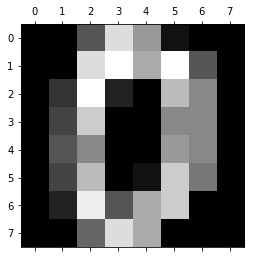

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

3. Tentons de visualiser quelques nombres. Regardez d’abord la taille de votre dataset. Combien de colonnes voyez vous ? 

Devinez ensuite quelle taille d’image ce nombre de colonnes devraient donner

In [0]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

(1797, 64)

4. Regardez maintenant la documentation liée à [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib. Essayez de visualiser un nombre au hasard. Ajoutez en légende, le nombre auquel cette image correspond. Essayez ensuite de visualiser 10 nombres au hasard dans le dataset

Text(0.5, 1.0, 'Number: 8')

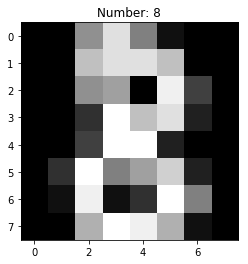

In [57]:
plt.imshow(digits.images[8])
plt.title("Number: {}".format(digits.target_names[8]))

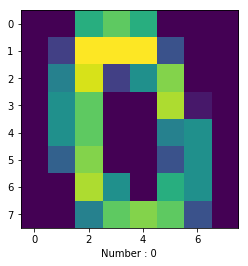

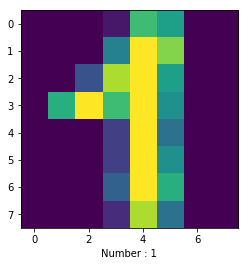

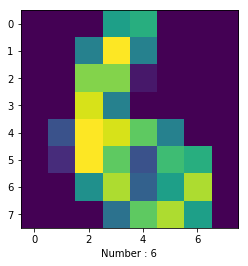

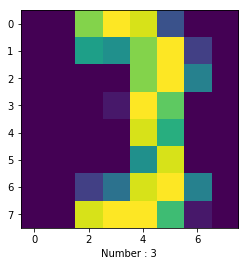

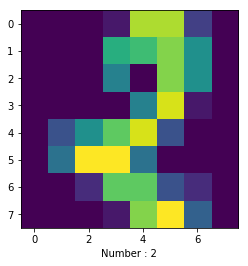

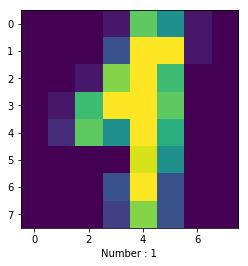

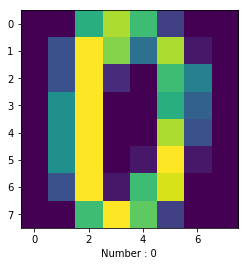

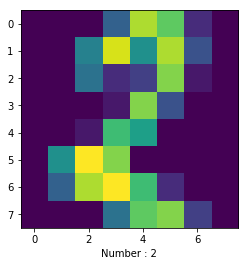

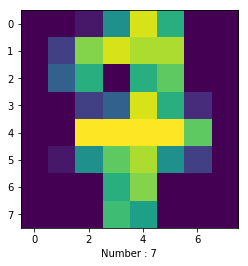

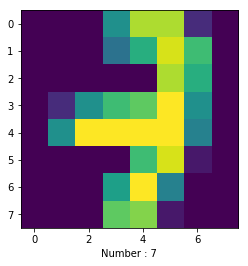

5. On va appliquer les KMeans sur notre dataset, à votre avis, à combien de clusters va-t-on initialiser l’algorithme ?

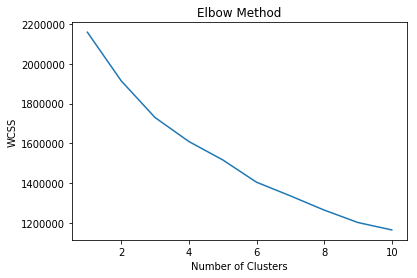

In [0]:
# Using the Elbow method to find the optimal number K of clusters
from sklearn.cluster import KMeans
X = digits.data
wcss =  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.11832841100655983
For n_clusters = 3 The average silhouette_score is : 0.1265415792194053
For n_clusters = 4 The average silhouette_score is : 0.12801530390921514
For n_clusters = 5 The average silhouette_score is : 0.13717816072927472
For n_clusters = 6 The average silhouette_score is : 0.15115491877067683
For n_clusters = 7 The average silhouette_score is : 0.16177381269483868
For n_clusters = 8 The average silhouette_score is : 0.17880419723273033
For n_clusters = 9 The average silhouette_score is : 0.18914167962876496
For n_clusters = 10 The average silhouette_score is : 0.18240309354827952
For n_clusters = 11 The average silhouette_score is : 0.18270881323070284
For n_clusters = 12 The average silhouette_score is : 0.1831904283719492
For n_clusters = 13 The average silhouette_score is : 0.1853618434787954
For n_clusters = 14 The average silhouette_score is : 0.18798716095670537
For n_clusters = 15 The average silhouette_score 

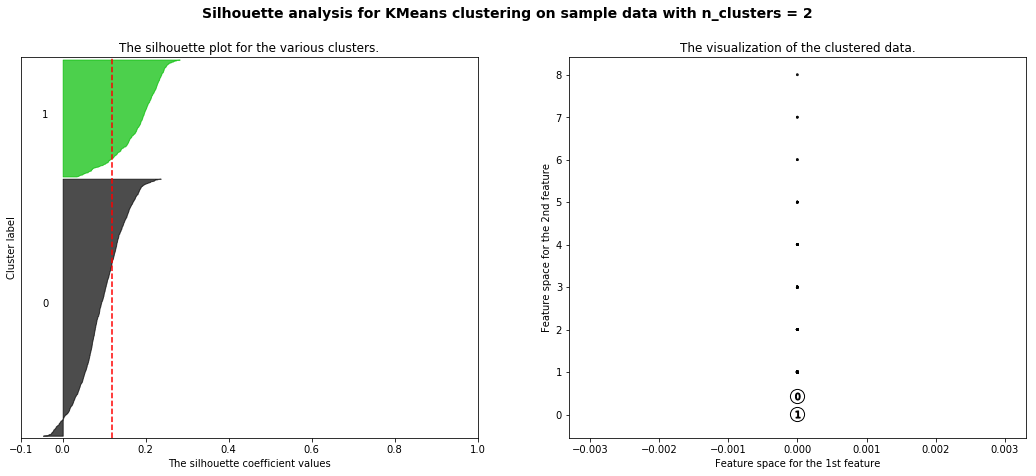

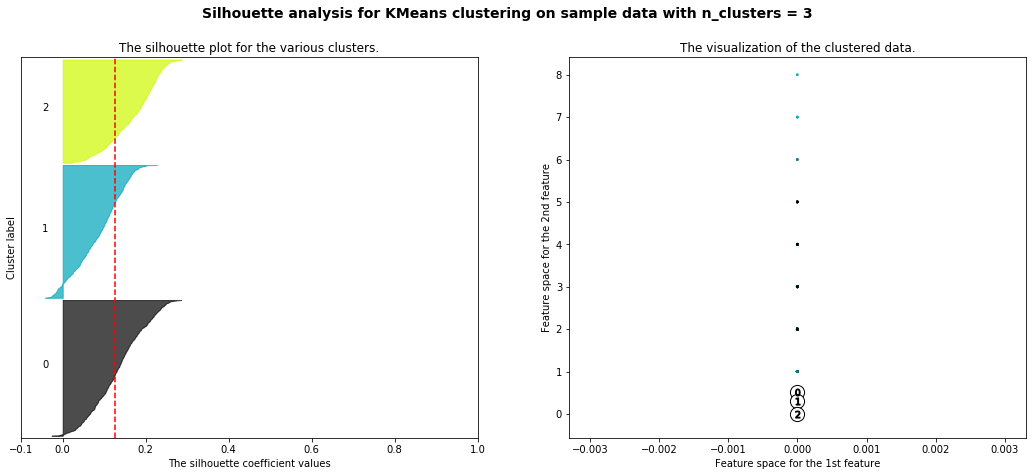

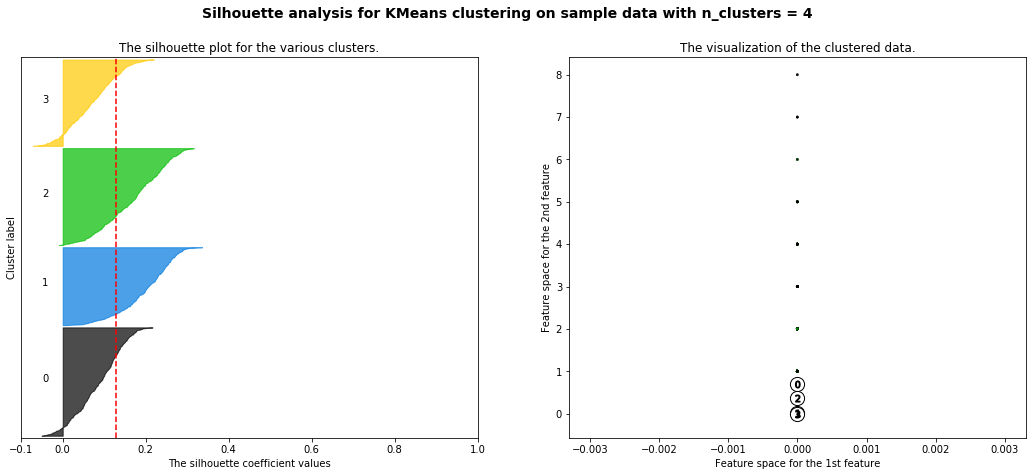

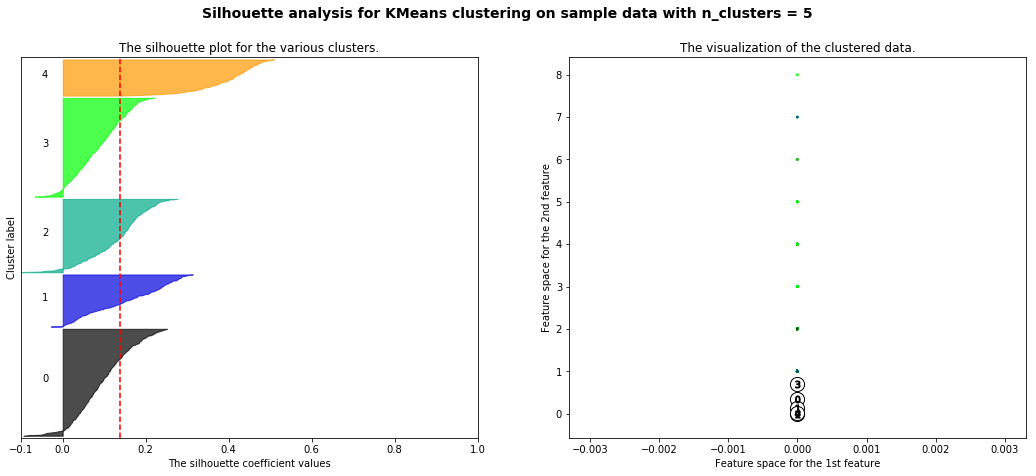

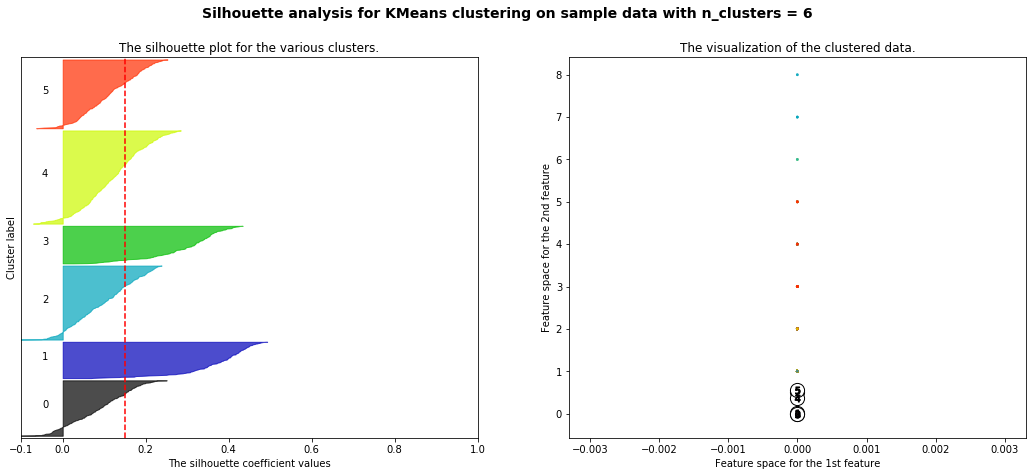

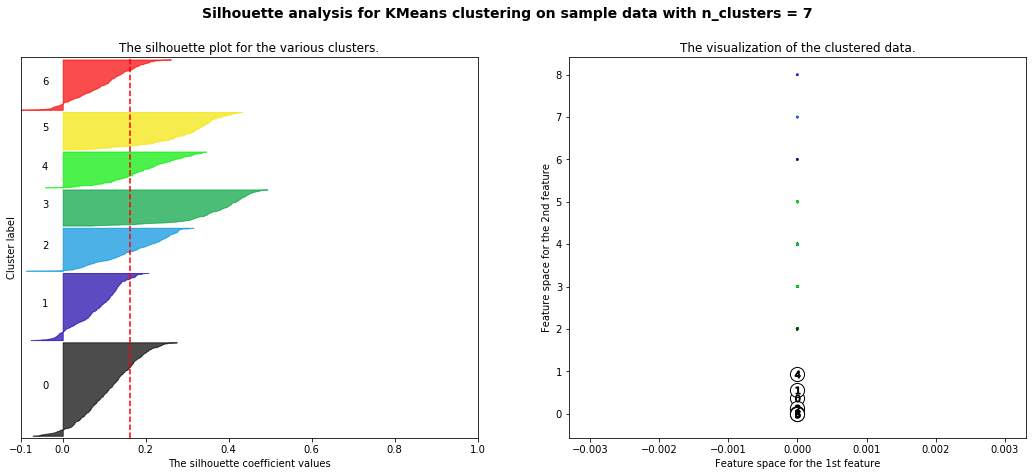

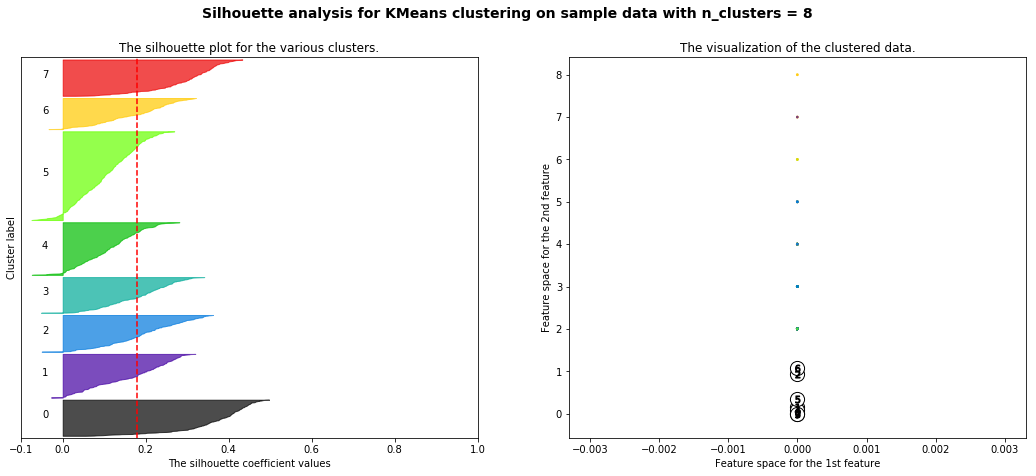

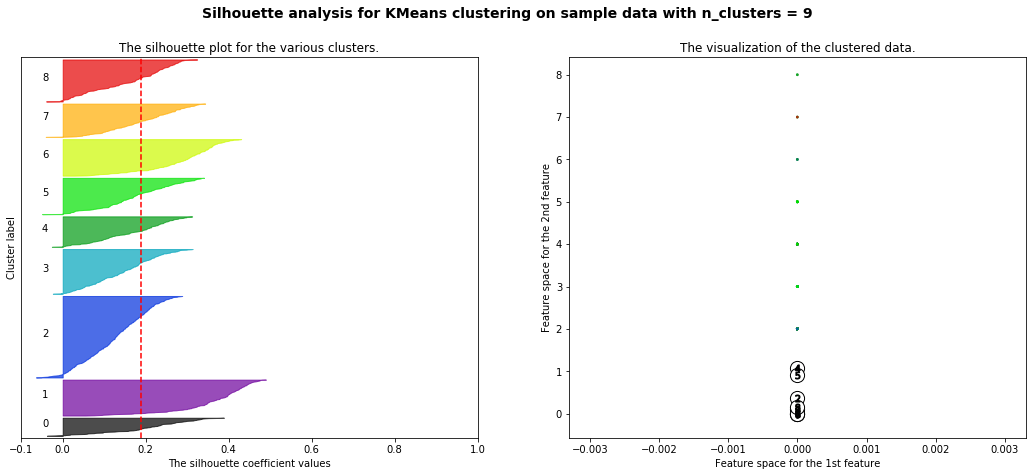

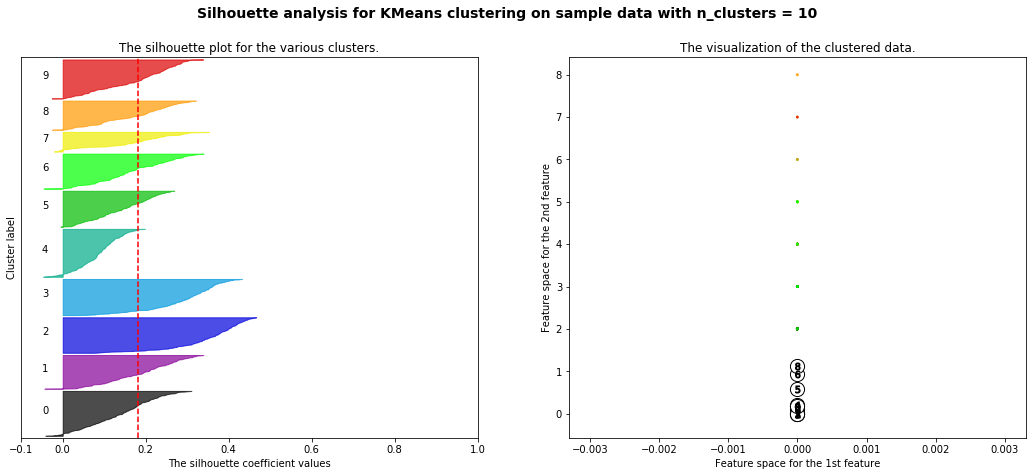

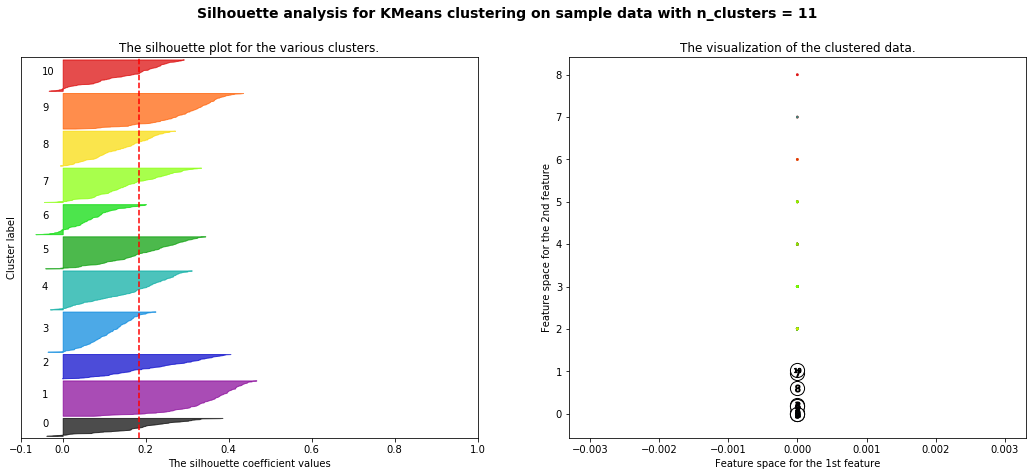

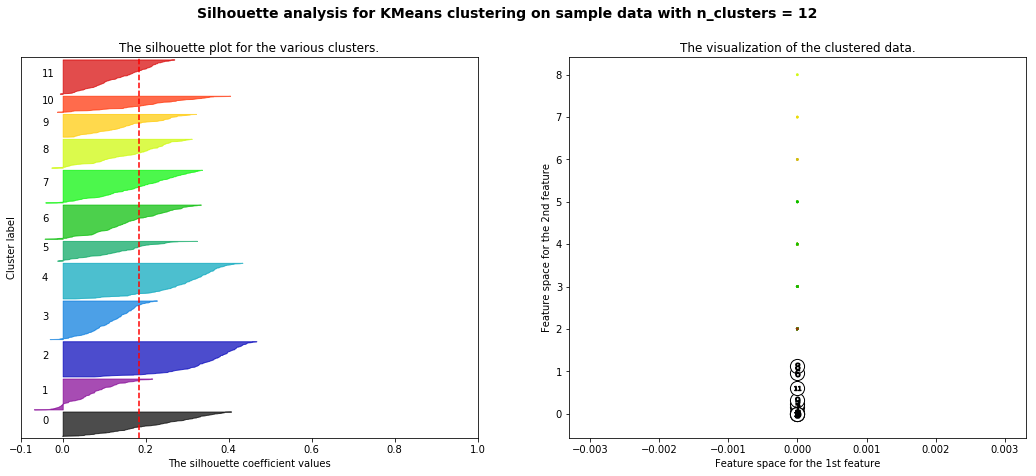

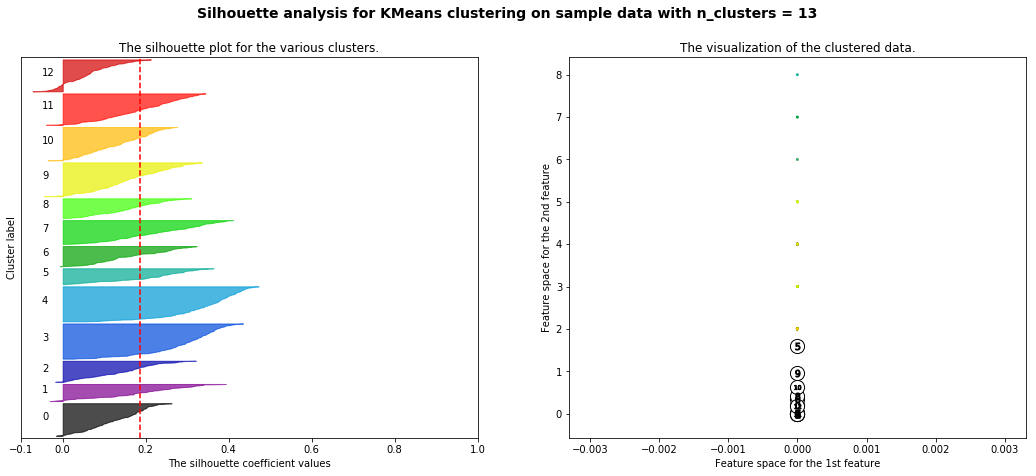

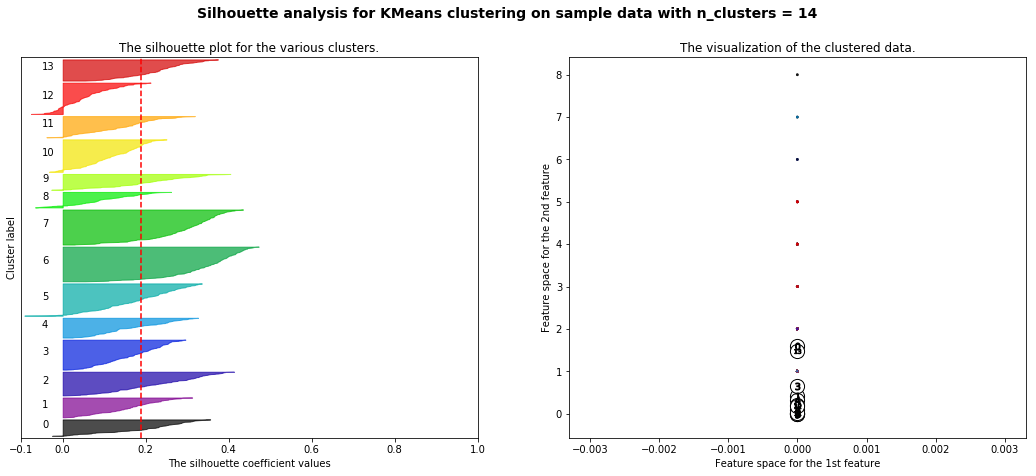

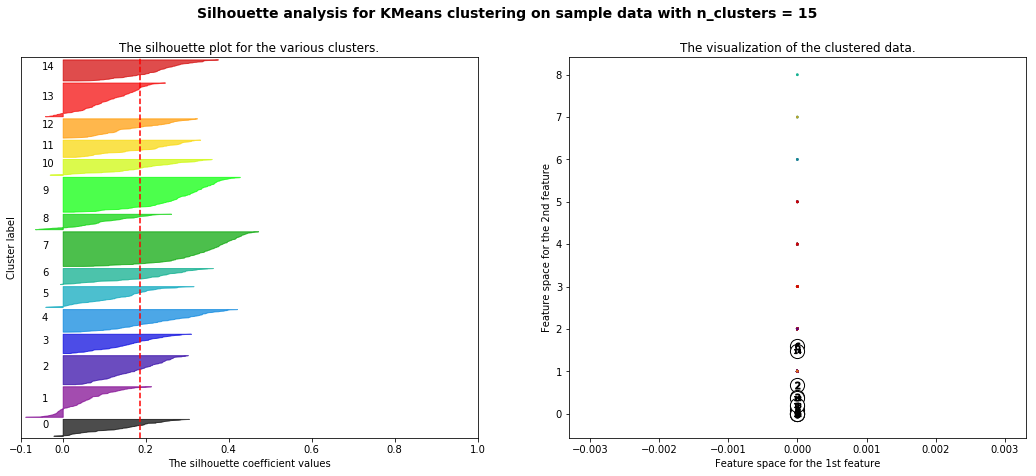

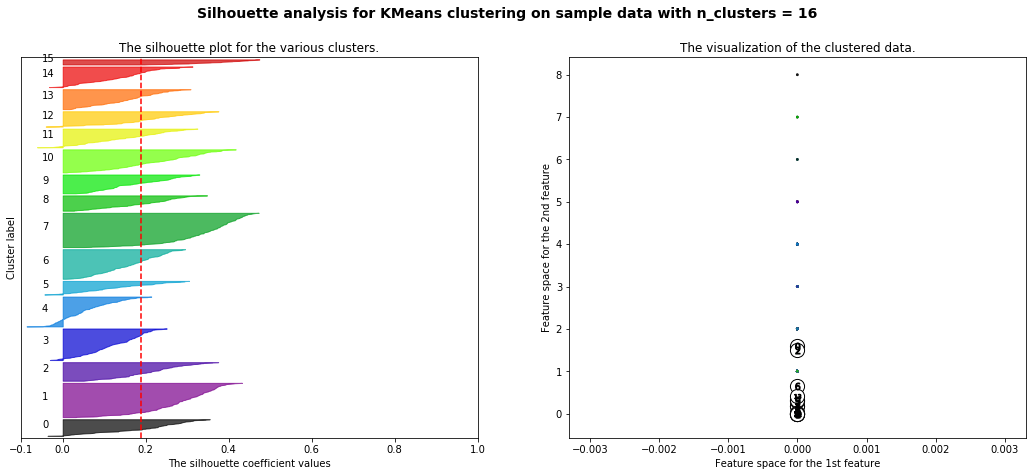

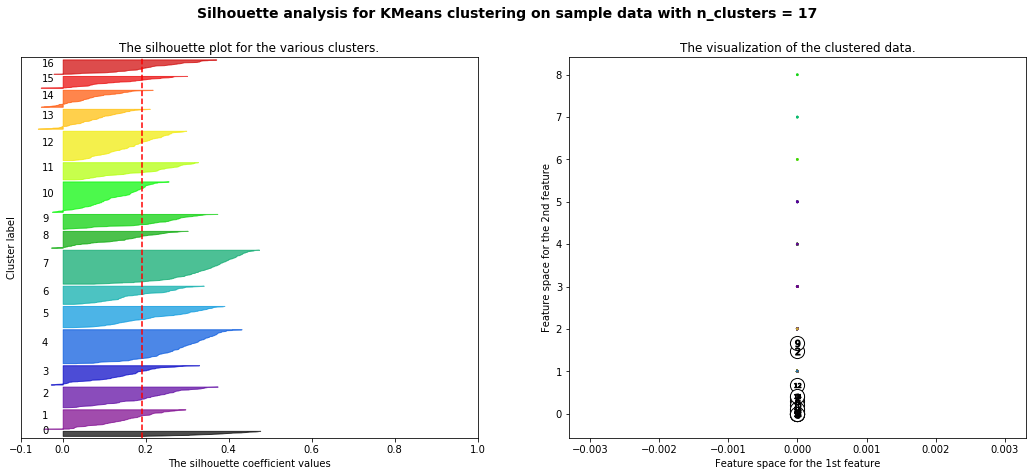

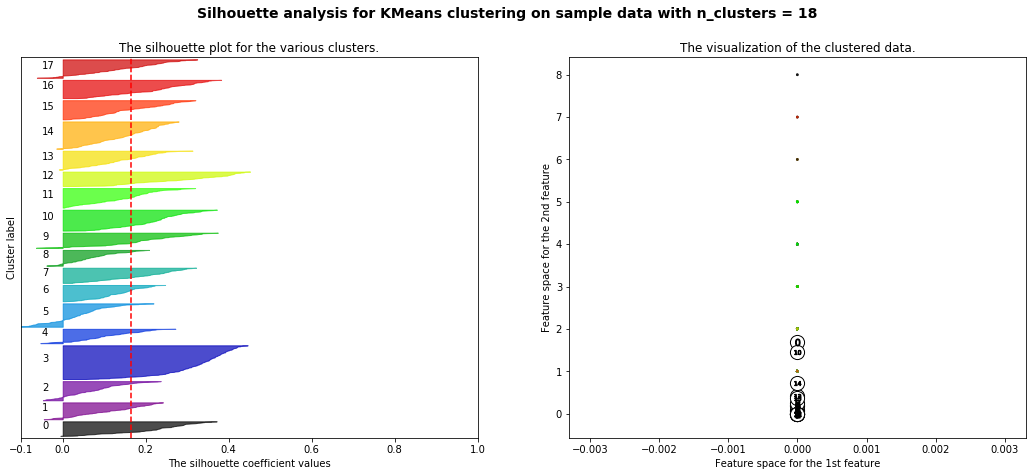

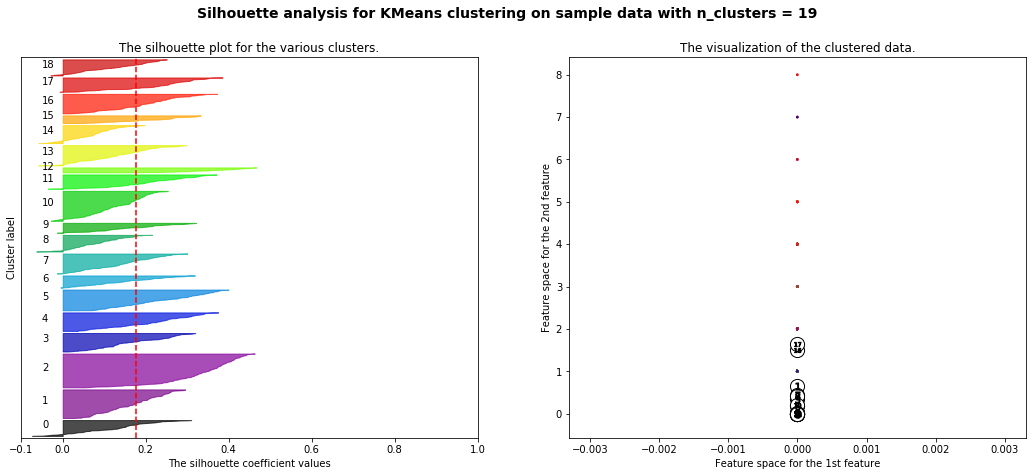

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = range(2, 20)#[2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

6. Créez votre algorithme de KMeans avec le bon nombre de clusters

In [88]:
from sklearn.cluster import KMeans

#kmeans = KMeans(n_clusters= 10, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans = KMeans( init = "k-means++",  random_state = 0)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

7. Evaluons notre modèle, calculons l’_accuracy_score_ de nos prédictions en important le module de sklearn. Que concluez-vous ?

In [89]:
from sklearn.metrics import accuracy_score
pred = kmeans.predict(X)
accuracy_score(pred, digits.target)

0.04062326099053979

0.2426265998887034

8. Regardez les coordonnées des centroïds (cf. [cluster_center_](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cluster.KMeans.html))

In [0]:
kmeans.cluster_centers_

9. Essayez de visualiser chacun des centroïds et comparez les avec les différents labels. Que remarquez vous ?

In [66]:
pred

array([0, 1, 1, ..., 1, 3, 3], dtype=int32)

In [0]:
new = kmeans.cluster_centers_[pred]

In [65]:
new[0]

array([ 0.00000000e+00,  1.05540897e-02,  2.54089710e+00,  1.17704485e+01,
        1.05804749e+01,  2.35092348e+00,  6.33245383e-02, -4.16333634e-16,
       -2.77555756e-17,  4.22163588e-01,  9.43007916e+00,  1.39788918e+01,
        8.81530343e+00,  5.70712401e+00,  4.69656992e-01,  5.55111512e-16,
       -1.38777878e-17,  2.09762533e+00,  1.31635884e+01,  7.70976253e+00,
        1.43799472e+00,  5.69129288e+00,  1.80211082e+00,  2.63852243e-03,
        7.37257477e-18,  3.75989446e+00,  1.33562005e+01,  5.11609499e+00,
        2.00263852e+00,  5.51978892e+00,  3.46965699e+00,  2.63852243e-03,
        0.00000000e+00,  4.97361478e+00,  1.32770449e+01,  6.70712401e+00,
        6.21108179e+00,  9.87862797e+00,  5.01583113e+00,  0.00000000e+00,
        1.05540897e-02,  3.22955145e+00,  1.40686016e+01,  6.49604222e+00,
        4.09762533e+00,  1.09973615e+01,  7.27704485e+00,  1.10817942e-01,
        2.11081794e-02,  7.30870712e-01,  1.16094987e+01,  1.12981530e+01,
        8.29287599e+00,  

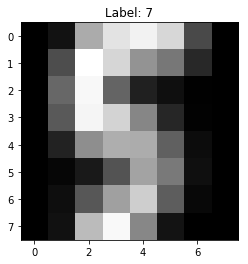

In [90]:
for i in range(len(kmeans.cluster_centers_)):
  plt.imshow(kmeans.cluster_centers_[i].reshape(8,8))
  plt.title("Label: {}".format(digits.target_names[i]))

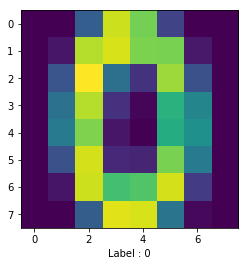

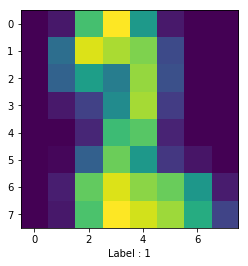

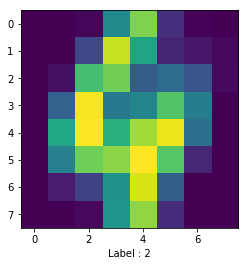

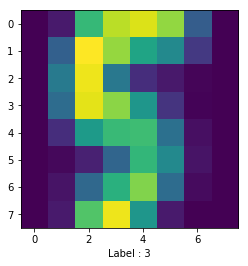

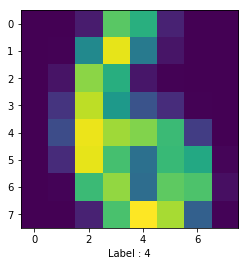

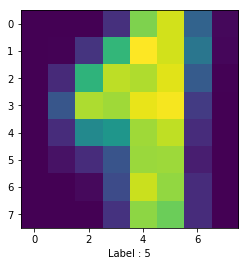

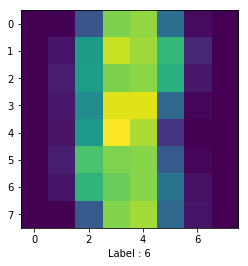

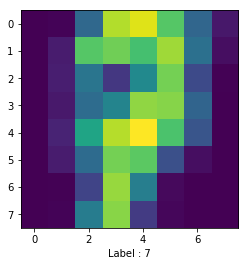

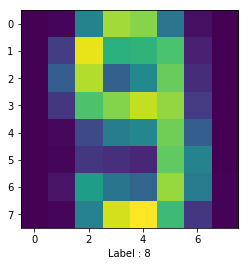

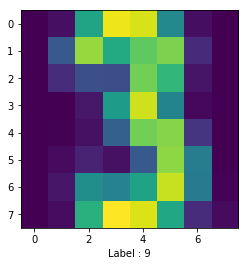

10. Trouver un moyen de remettre les choses dans l’ordre. Voici quelques indices :

    a. Regardez dans quel cluster appartient le plus de chiffres similaires de la variable _target_
   

In [71]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [81]:
comp = pd.DataFrame(data = digits.target.tolist() , columns = ['Target'])
comp["Pred"] = pred
comp = comp.groupby(["Target", "Pred"]).size().reset_index(name='count')
comp.sort_values(by = "count", ascending=False)

,Target,Pred,count
1,0,5,177
32,7,4,177
31,6,9,177
20,4,0,163
15,3,1,154
14,2,8,148
44,9,3,139
25,5,2,136
39,8,7,100
5,1,7,99


In [83]:
#pred==2 renvoie False ou True. Il va sélectionner dans target les éléments qui sont aux indexes où la valeur dans pred est 2
digits.target[pred==2]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 5, 5, 8, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 9, 9, 5, 5,
       5, 5, 5, 5, 5, 9, 9, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5])

11. Réévaluez votre modèle. Quel est votre nouvel *accuracy_score* ?

<function ndarray.view>

0.7957707289927657

12. Regardez les chiffres où notre algorithme s’est le plus trompé via une matrice de confusion

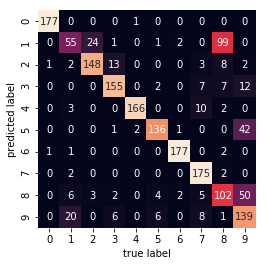

13 Est ce que l'utilisation d'une PCA pourrait améliorer le clustering ?

In [0]:
#pca.transform
#pca.inverse_transform

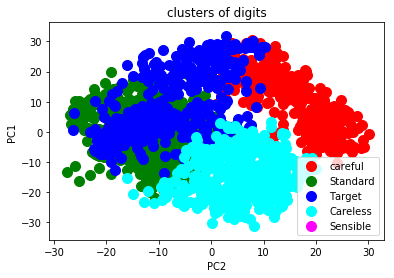

In [0]:
from sklearn.decomposition import PCA
y_kmeans = pred
pca = PCA(n_components = 3)
X_pca = pd.DataFrame(pca.fit_transform(X), columns = ["PC1", "PC2", "PC3"])

plt.scatter(X_pca.iloc[:, 1][y_kmeans == 0], X_pca.iloc[:, 0][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 1], X_pca.iloc[:, 0][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 2], X_pca.iloc[:, 0][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 3], X_pca.iloc[:, 0][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 4], X_pca.iloc[:, 0][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
#plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of digits')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.legend()
plt.show()